In [461]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import statistics 


In [462]:
start=dt.datetime(2017,1,1)
end=dt.datetime(2018,1,1)

In [463]:
prices = pdr.get_data_yahoo('IBM',start,end,interval='d')['Adj Close']
print(prices)
returns=prices.pct_change()
last_price=prices[-1]
last_year_return=np.log(prices[-1]/prices[0])
print(last_year_return)

Date
2017-01-03    145.416626
2017-01-04    147.217041
2017-01-05    146.729950
2017-01-06    147.451843
2017-01-09    145.816681
                 ...    
2017-12-22    137.784317
2017-12-26    138.082474
2017-12-27    138.353546
2017-12-28    139.175720
2017-12-29    138.615540
Name: Adj Close, Length: 251, dtype: float64
-0.0478987065890953


Mean -0.00014343278633151792
Std div 0.009874207214010765


/Users/seemakhattar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


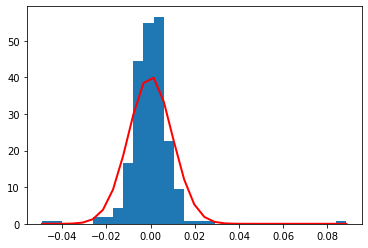

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [464]:
mu = np.nanmean(prices.pct_change())
sigma=np.nanstd(prices.pct_change())
print('Mean',mu)
print('Std div',sigma)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(prices.pct_change(), 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2,color='r')
plt.show()
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# normality test
stat, p = shapiro(prices.pct_change())
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [503]:
num_simulation=100
num_days=31
simulation_df=pd.DataFrame()
simulation_returns=[]
prices_simulation=[]

In [508]:
simulation_returns=[]
for x in range(num_simulation):
    if(x==num_simulation):
        break
    count = 0;
    daily_vol=returns.std()
    price_series=[]
    price=last_price*(1+np.random.normal(0,daily_vol))
    price_series.append(price)
    for y in range(num_days):
        if(count==31):
            break;
        price=price_series[count]*(1+np.random.normal(0,daily_vol))
        price_series.append(price)
        count+=1
        if count==1:
            prices_simulation.append(price)
    simulation_df[x]=price_series
    #return_comp=np.log(simulation_df[x].iloc[-1]/ simulation_df[x].iloc[0])
    #print(simulation_df[30])
    simulation_returns.append(price)   

In [ ]:
fig=plt.figure()
plt.figure(figsize=(20,10))
plt.plot(simulation_df)
plt.axhline(y=last_price,color='r',linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Mean 138.6006451229738


/Users/seemakhattar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


TypeError: 'numpy.float64' object is not callable

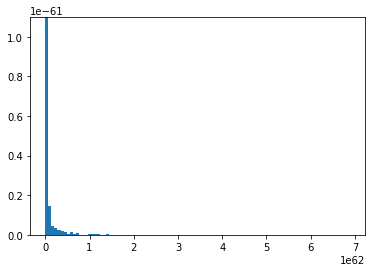

In [514]:
import matplotlib.pyplot as plt
mu = np.nanmean(prices_simulation)
print('Mean',mu)
sigma=statistics.pstdev(prices_simulation)
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
#plt.axis('tight')
plt.show()

In [488]:
#print(simulation_returns)
mean = np.nanmean(simulation_returns)
print('Mean',mean)
std_div=statistics.pstdev(simulation_returns)

print('Std div',std_div)

Mean 138.91455544884752
Std div 8.433661294288868


In [515]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.99
n = len(simulation_returns)
m = np.nanmean(simulation_returns)
std_err = sem(simulation_returns)
h = std_err * 1.96
min = m - h
print(min)
max = m + h
print(max)

138.00635610192356
141.34862034345403


<Figure size 432x288 with 0 Axes>

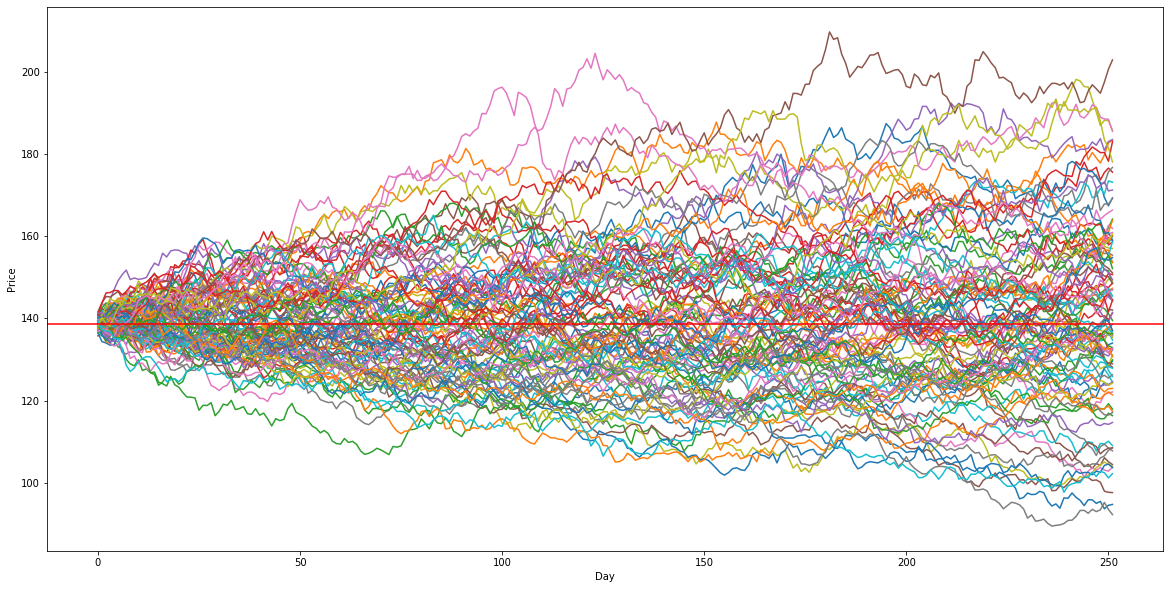